## 1 - Troque a função seno por $x^6$ nos exemplos acima e realize a mesma análise apresentada nessa aula.

In [1]:
def funcao(x):
    f = x**6
    return f

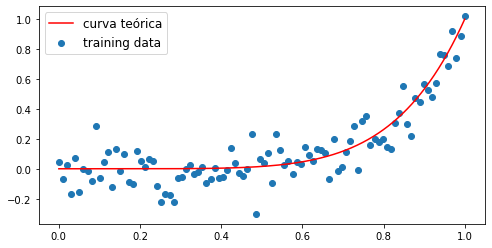

In [2]:
import numpy as np
from matplotlib import pyplot as plt

sigma = 0.1

np.random.seed(12)

# training set
N_train = 100

x_train = np.linspace(0, 1, N_train)
y_train = funcao(x_train) + np.random.normal(0, sigma, N_train)
x_train = x_train.reshape(len(x_train),1 )

# test set
N_test = 50

x_test = np.linspace(0, 1, N_test)
y_test = funcao(x_test) + np.random.normal(0, sigma, N_test)
x_test = x_test.reshape(len(x_test),1 )

#set teórico x**6
xt = np.linspace(0, 1, 1000)
yt = funcao(xt)

#plotando dados}
fig = plt.figure(figsize = (8, 4))
plt.scatter(x_train, y_train, label = 'training data')
plt.plot(xt, yt, '-r', label = 'curva teórica' )
plt.legend(fontsize = 12)
plt.show(True)



In [3]:
def rmse(a, b): #definindo funcao custo como funcao do erro quadratico medio (RMSE)
    return np.sqrt(np.mean(np.square(a - b)))

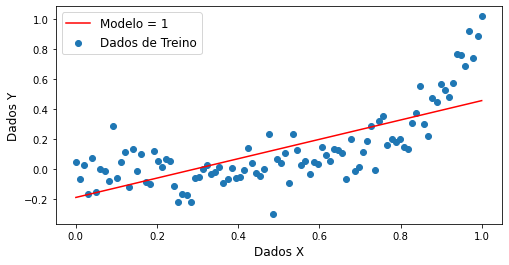

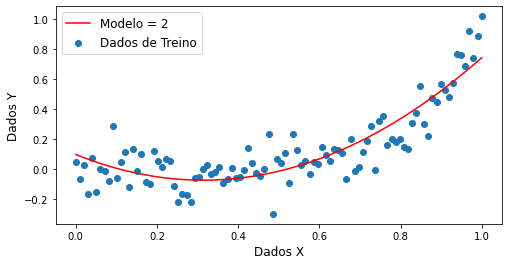

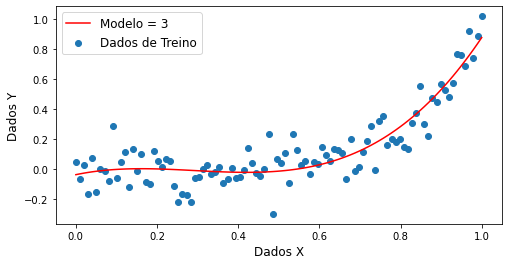

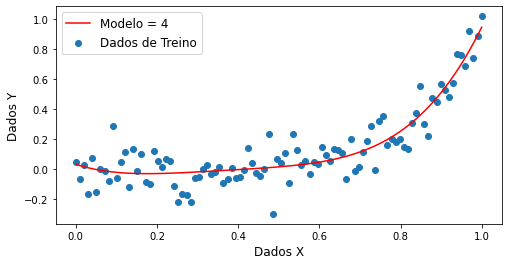

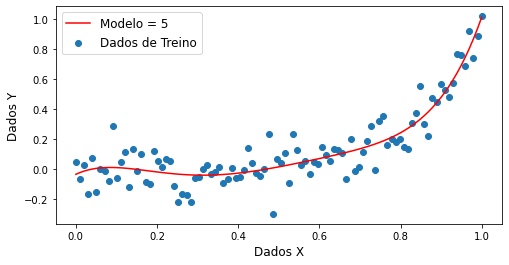

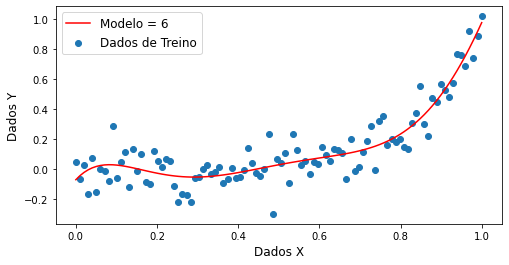

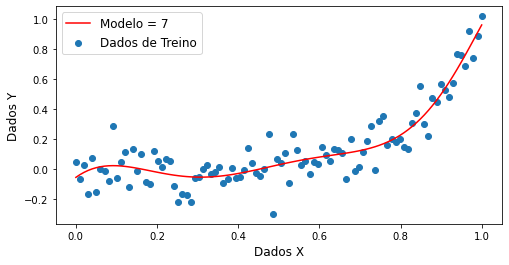

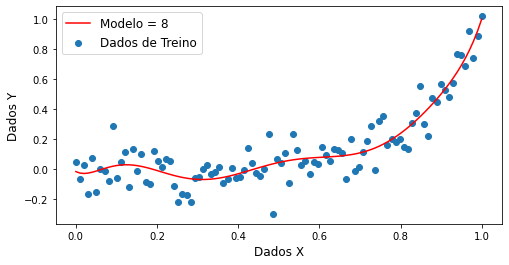

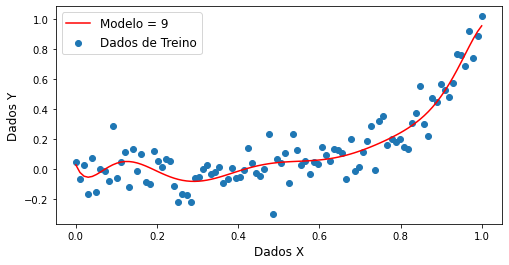

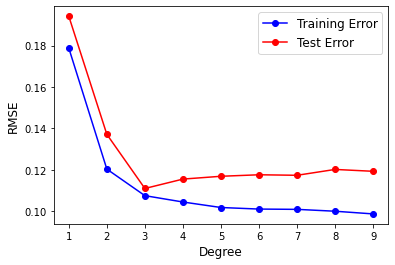

In [4]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

x_plot=np.linspace(0,1,N_train) 
x_plot=x_plot.reshape(len(x_plot), 1)

er_train = []
er_test = []
degree = []

for M in  np.arange(1, 10):
    poly = PolynomialFeatures(degree = M)
    X_train = poly.fit_transform(x_train)
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
   
    X_plot = poly.fit_transform(x_plot)
    Y_pred = model.predict(X_plot)
    X_test = poly.fit_transform(x_test)
    Y_pred_test = model.predict(X_test) 
    
    erro_train = rmse(Y_pred, y_train)
    er_train.append(erro_train)
    erro_test = rmse(Y_pred_test, y_test)
    er_test.append(erro_test)
    degree.append(M)
    
    fig = plt.figure(figsize = (8,4))
    plt.plot(x_plot, Y_pred, '-r', label = 'Modelo = %i' %M)
    plt.scatter(x_train, y_train, label = 'Dados de Treino')
    plt.legend(fontsize = 12)
    plt.xlabel('Dados X', fontsize = 12)
    plt.ylabel('Dados Y', fontsize = 12)
    plt.show(True)
    
plt.plot(degree, er_train, 'b-o' ,label = 'Training Error')
plt.plot(degree, er_test, 'r-o', label = 'Test Error')
plt.legend(fontsize = 12)
plt.xlabel('Degree', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.show(True)

    

Relizando o exercício 1 com o método de Hold-out (with folders)

M: 1 Average accurace: -2.836313328620861
M: 2 Average accurace: -0.8517912480744719
M: 3 Average accurace: -0.28070818203908127
M: 4 Average accurace: -0.6220217385843902
M: 5 Average accurace: -0.4188455144102047
M: 6 Average accurace: -0.24958092548754127
M: 7 Average accurace: -3.0039461401072804
M: 8 Average accurace: -21.84503715655533
M: 9 Average accurace: -12.875230717557551
M: 10 Average accurace: -6.487008393982075
Melhor M: 6


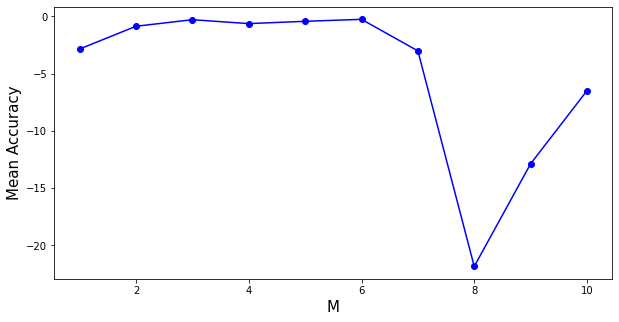

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

nkf = 10 #number of folds
vk = []
vscore = []
for M in np.arange(1, 11):
    poly = PolynomialFeatures(degree = M)
    X_train = poly.fit_transform(x_train)    
    model = linear_model.LinearRegression()
    cv = cross_validate(model, X_train, y_train ,cv=nkf)
    print('M:', M, 'Average accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(M)

best_M = np.argmax(vscore)+1 # the index of the vector starts in zero
print('Melhor M:', best_M)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('M', fontsize = 15)
plt.ylabel('Mean Accuracy', fontsize = 15)
plt.show()

Accuracy: 0.1176199385844225


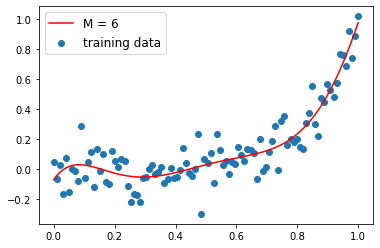

In [7]:
#após escolher o melhor modelo, treinar com ele
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = best_M)
X_train = poly.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

Y_pred = model.predict(X_train)
X_test = poly.fit_transform(x_test)
Y_pred_test = model.predict(X_test)

print('Accuracy:', rmse(Y_pred_test, y_test))

plt.plot(x_train, Y_pred, 'r',label = 'M = %i' %best_M)
plt.scatter(x_train, y_train, label = 'training data')
plt.legend(fontsize = 12)
plt.show(True)

## 2 - Verifique como a acurácia muda em função do número de grupos k na validação cruzada, conforme feito acima, para a base de dados Vehicle.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed = np.random.seed(42)

#importind data from csv - vehicle data
data_vehicle = pd.read_csv('base_dados/Vehicle.csv', header=(0))
data_vehicle = data_vehicle.dropna(axis = 'rows') #removendo NaN

print(data_vehicle.shape)
data_vehicle.head(5)

(846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [9]:
#tornando os dados no modelo numpy
data_vehicle = data_vehicle.values
nrow, ncol = data_vehicle.shape

y = data_vehicle[:,-1]
x = data_vehicle[:,0:ncol-1]

print(x.shape, y.shape)


(846, 18) (846,)


In [10]:
from sklearn.model_selection import train_test_split

p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = p, shuffle=True, random_state=seed) #shuffle para misturar o dataset antes de separar

k: 1 Accuracy: 0.6317796610169492
k: 2 Accuracy: 0.5980225988700565
k: 3 Accuracy: 0.6217231638418079
k: 4 Accuracy: 0.6285028248587571
k: 5 Accuracy: 0.6403389830508475
k: 6 Accuracy: 0.6200564971751412
k: 7 Accuracy: 0.6235310734463277
k: 8 Accuracy: 0.630225988700565
k: 9 Accuracy: 0.6437288135593221
k: 10 Accuracy: 0.6386723163841808
k: 11 Accuracy: 0.6268644067796612
k: 12 Accuracy: 0.6234745762711864
k: 13 Accuracy: 0.6099717514124294
k: 14 Accuracy: 0.6150564971751413
k: 15 Accuracy: 0.615084745762712
k: 16 Accuracy: 0.620141242937853
k: 17 Accuracy: 0.6183333333333334
k: 18 Accuracy: 0.621779661016949
k: 19 Accuracy: 0.6251977401129943
k: 20 Accuracy: 0.6150282485875707
Melhor k: 9


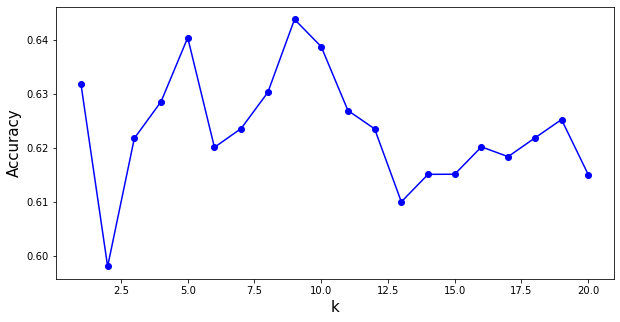

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

nkf = 10 #number of folds
vk = []
vscore = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    print('k:', k, 'Accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Performance Final do Modelo:', accuracy_score(y_pred, y_test))

Performance Final do Modelo: 0.6220472440944882


## 3 - Varie o número de folds para a base iris, de 2 até 20 e verifique se essa escolha influencia na classificação.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#importind data from csv - vehicle data
data_iris = pd.read_csv('base_dados/iris.csv', header=(0))
data_iris = data_iris.dropna(axis = 'rows') #removendo NaN

print(data_iris.shape)
data_iris.head(5)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
#transformando no formato de array numpy
data_iris = data_iris.values
nrow, ncol = data_iris.shape

y = data_iris[:,-1]
x = data_iris[:,0:ncol-1]

print(x.shape, y.shape)

(150, 4) (150,)


In [19]:
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = p)

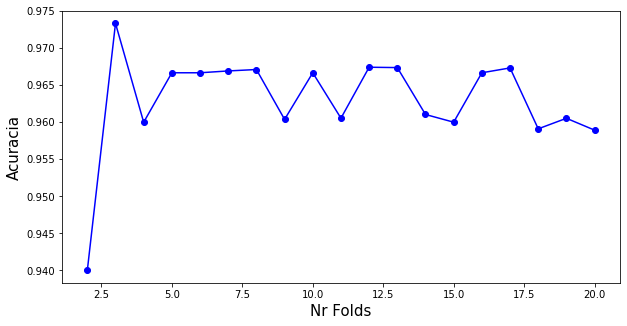

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

cv_means = []
n_folds_values = np.arange(2, 21)

for n_folds in n_folds_values:
    model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    cv_result = cross_validate(model, x, y, scoring='accuracy', cv=n_folds)
    cv_mean = cv_result['test_score'].mean()
    cv_means.append(cv_mean)

plt.figure(figsize=(10,5))
plt.plot(n_folds_values, cv_means, '-bo')
plt.xlabel('Nr Folds', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show()